<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/ClassNotebooks/Day4_classnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4: Fourier-Transform Infrared Spectroscopy
MSE 7530, Fall 2025, Wayne State University  
Wednesday, September 10th, 2025  
Prof. Camille Bishop  

## Part 0.5: Quick refresher and necessary import cells
Every notebook will generally start with all the necessary import cells in one place; here I will import all packages that we used at once.

In [1]:
# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Setting up file access to the class GH Repo and your personal Google Drive

In [2]:
!git clone https://github.com/cbishop4/MSE7530.git
from google.colab import drive
drive.mount('/content/drive')

Cloning into 'MSE7530'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 143 (delta 55), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 6.85 MiB | 9.26 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Mounted at /content/drive


## Python Skill 1: User-defined Functions

You can make a user-defined function to solve any equation. It can have as many inputs and as many outputs as you want. Here is a simple equation to find the volume of a sphere, given its radius:

In [3]:
def sphere_volume(radius):
  vol = (4/3)*np.pi*radius**3
  return vol

We can then call the function using its name

In [4]:
Vsph_2 = sphere_volume(2)
print(f'The volume of the sphere with radius of 2 is {Vsph_2}')

The volume of the sphere with radius of 2 is 33.510321638291124


<font color='red'>  Write a function to calculate the wavelength of a photon of a given energy, and use it to answer the question: A typical synchrotron X-ray scattering experiment uses X-rays with energy = 10 keV. What is the X-ray wavelength in nm?

Scientific reminders:  
$E = h\nu$  
$\nu = \frac{c}{\lambda}$  
$h = 6.626 \times 10^{-34} J \cdotp s$  
$c = 3.0 \times 10^{8} m/s$  
$1 eV = 1.602 \times 10^{-19} J$

In [5]:
# your code here
def wavelength_photon(energy_eV):
  h = 6.626 * 10**-34
  c = 3.0 * 10**8
  wavelength = h * c / (energy_eV * 1.602 * 10**-19)
  wavelength = wavelength * 10**9
  return wavelength


In [7]:
wavelength_photon(10000.)

0.12408239700374532

We can also use a function to calculate a range of volumes at once. For example, let's take a range of sphere radii. We use the


```
np.linspace(start, stop, numvalues)
```
function to generate a numpy array of evenly spaced numbers quickly. For future reference, there is also a
```
np.logspace()
```
function, which generates a numpy array of values that are evenly spaced on a log scale.


In [8]:
radii = np.linspace(1,10,10) # generates an array from 1 to 10 with 10 values
print(radii)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Text(0, 0.5, 'Volume ($nm^{3}$)')

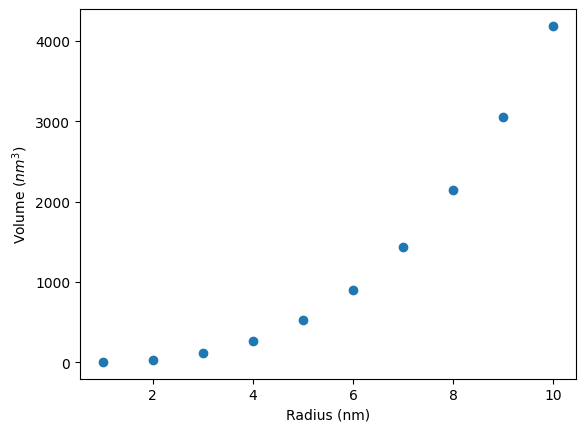

In [9]:
volumes = sphere_volume(radii)
plt.plot(radii,volumes,'o')
plt.xlabel('Radius (nm)')
plt.ylabel('Volume ($nm^{3}$)')

<font color='red'>Now, do the same for a range of X-ray energies from 100 eV to 10 keV. What do you notice about the plot? Is there a better way to scale it?

Text(0, 0.5, 'Wavelength (nm)')

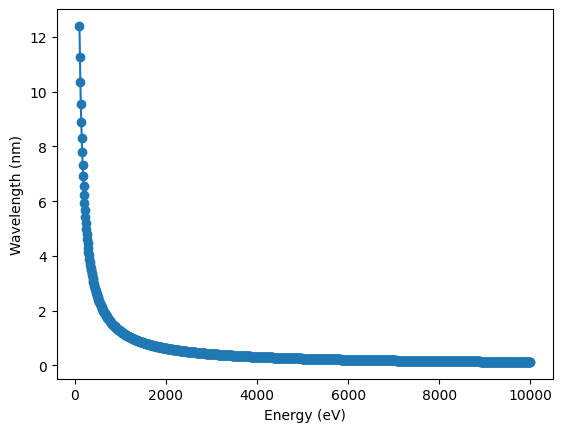

In [12]:
# your code here
energies = np.linspace(100,10000,1000) # generates a numpy array of evenly spaced numbers
wavelengths = wavelength_photon(energies) # calculates the wavelength corresponding to
# each energy; outputs a numpy array, since a numpy array was input
plt.plot(energies,wavelengths,'-o') # plot
plt.xlabel('Energy (eV)')
plt.ylabel('Wavelength (nm)')

#### <font color='blue'>The most important concepts from above:
1) A user-defined function can be used to automatically calculate quantities, avoiding large repeated blocks of code  
2) An array of values can be passed to a function to output an array of corresponding return values, enabling quick plotting of trends

## Part 2: Fourier Transform Infrared Spectroscopy

Return to the class powerpoint/board for theoretical background.

##  Exercise 1: Calculating "toy" interferograms
<font color='red'><font size=5> Calculate the intensity I as a function of $\delta$ (retardation, or difference in path length) for light with $\lambda$ = $2 \mu m$. Take the value $I_{0}$ to be arbitrarily equal to 1. </font></font>  
Note that the cosine function is part of numpy and <font color='blue'> takes inputs and outputs in radians.</font> There are a couple functions you can use to convert between the two. (You may or may not have to do this in this particular case; check if the cosine term is in radians or degrees)

```
np.cos(x) # input and output in radians
np.rad2deg(x) # converts an angle x in radians to degrees
np.radians(x) # converts an angle x in degrees to radians
np.pi # no arguments or parentheses for this; it is just a constant
```
Alternatively to using the function, you can just use the conversion where $\pi~ radians = 180°$.


Guide to the correct steps:  
1) Write a user-defined function that converts $\delta$ and $\lambda$ to Intensity.  
2) Define an evenly spaced numpy array of values of $\delta$ (I recommend values from -20 to 20 $\mu m$.    
3) Use your function to calculate the range of intensities expected.
4) Plot your intensities on the y-axis vs. $\delta$ on the x-axis.

In [ ]:
# your code here (add extra cells if necessary)

<font color='red'> Does this look like the interferogram in the example slides? Why or why not?

The above interferogram was generated from a single wavelength. If you had a monochromatic source, this is what your interferogram would look like. This corresponds to  
<font size=6>$I(\delta) = \frac{I_{0}}{2}[1 + cos(\frac{2\pi \delta}{\lambda})]  $  </font>  
Our case does still satisfy the formula for a total interferogram at multiple wavelengths,  
<font size=6>$I_{T}(\delta) = \sum_{k=1}^{K}{\frac{I_{k,0}}{2}[1 + cos(\frac{2\pi \delta}{\lambda_{k}})]} $,  </font>  
We just simply only have one k (value for wavelength). Next, we will have multiple k's, so the summation will actually be over many terms.

### <font color='blue'> Guided: Making the interferogram for many wavelengths (I have written this code because it requires a few new concepts at once)

In [ ]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum:
  interferogram += I_delta(deltas,wl)

In [ ]:
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\delta$ ($\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Does this look like the interferogram in the example slides? Why or why not?

In [ ]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum:
  interferogram += I_delta(deltas,wl)

In [ ]:
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\delta$ ($\mu$m)')
plt.ylabel('Intensity')

The uniformity of the above interferogram is due to the condition that $I_{0}$ is equal to 1 for every wavelength. Now, we will generate a totally random array of $I_0$ values using the np.random() function.

In [ ]:
I_0s = np.random.rand(len(wl_spectrum)) # generates a numpy array of random intensities between 0 and 1
I_0s

In [ ]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
i = 0
for wl in wl_spectrum:
  interferogram += I_delta(deltas,wl,I_0=I_0s[i])
  i += 1

In [ ]:
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\delta$ ($\mu$m)')
plt.ylabel('Intensity')

### Importance of $I_{0}$ values
In the previous exercise, we used $I_{0} = 1$ for every wavelength of IR radiation. However, as we know, the interactions with IR light (which are what we want to measure in the first place) change these. That is why the interferogram generated above looks much more uniform than the real one in the lecture slides.  
In the following exercise, we will use variable $I_{0}$ values, including real experimental ones, and consider a few other practical considerations needed, including *apodization* and *background subtraction*.

## Exercise 2 : Building more realistic FTIR spectra
In this activity, we will begin with similar exercises as above, and progress to more realistic/complete spectra.  
Adapted from B. Shepherd & M.K. Bellamy, *J. Chem. Ed.* 89, 5, (2012).

#### Defining instrumental parameters and the sampling interval

The "experimental details" of the spectrometer we will "use" (which would be determined by the instrument you are using) are:  
Resolution: $16 ~cm^{-1}$   
Wavenumber range of spectrometer: $3200~ cm^{-1}$ to $470~ cm^{-1}$  
We will collect 989 data points in our interferogram.  
We calculate our sampling interval, h, based on the wavelength of the calibration laser

In [ ]:
lambda_HeNe = 632.8 #nm
h_cm = lambda_HeNe * 10**-7 #nm to cm
h_cm # this is the sampling interval

We collect a data point every $6.328 \times 10^{-5}$ cm.

Using the principle of Fourier transforms, the intensity as a function of retardation over a series of wavelengths (where $\bar{\nu}_{N}$ is the wavenumber equivalent to $\frac{1}{\lambda}$):  
$I(δ_{total}) = B_{1}cos(2π\bar{\nu}_{1}\delta) + B_{2}cos(2π\bar{\nu}_{2}\delta) + ... + B_{N}cos(2π\bar{\nu}_{N}\delta)$ <font color='grey'>(Equation 1)

#### Starting with a single wavenumber: $1500 cm^{-1}$.  
The Intensity, which we will refer to as B, for this wavenumber is $0.8$, for the sake of example. Note that we are beginning this by *creating* an interferogram; 0.8 is not an experimental measurement yet. Once we go backward, revisit this section and make sure you understand the physical meaning. IMO, it makes more sense later.  
With the single wavelength, Equation 1 reduces to:  
$I(\delta) = 0.8 * cos(2\pi * 1500 * \delta)$

#### <font color='blue'> Apodization  
This is a very important concept to deal with real data.  
A true Fourier transform requires data collection from $\delta = -\infty ~to + \infty$, but this is not possible on a real instrument. Additionally, for a real instrument, the signal will decay as the mirror moves further from the beamsplitter. **Apodization is a mathematical process that makes an interferogram recorded at finite retardation diminish in a way that mimics an interferogram recorded to infinite retardation.**  
The Apodization Function is given by:  
$A(\delta) = \frac{1}{2}[1 + cos (\frac{\pi\delta}{\Delta_{maximum}})]$  <font color='grey'> (Equation 2)</font>  
Where $\Delta_{maximum}$ is the total retardation needed to collect a spectrum at a given resolution, and is equal to $\frac{1}{resolution}*k_{max}$ (remember that $k_{max} = n_{points} - 1$)



<font size=6> The Apodized Function is given by $I(\delta)A(\delta)$

#### <font color='red'> Your turn: calculate $I(\delta), A(\delta), and~ I(\delta)A(\delta)$ for the single-wavelength case.
First, let's discuss: what shape will the data have?

First cell: Specify all constants and arrays you will need. Note that $\delta = kh$, where $k$ is equal to the number of data points, and $h$ is the sampling interval. The first value of $k$ is $0$.

In [ ]:
# your code here
h_cm =
ks =
deltas =
B_1 =
wavenumber =
Delta_max =

Second cell: Calculate $A(\delta)$ and $I(\delta)$ and save them as variables (these variables will be numpy arrays).

In [ ]:
# your code here


Third cell: Calculate $A(\delta)I(\delta)$ and save as a variable (again a numpy array)

In [ ]:
# your code here


Fourth cell: Plot the 3 quantities so you can see what you were working with

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here

You can see that the intensity functions have a lot of detail that we can't see because of scaling, so let's look at a smaller portion for our own education.

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
  a.set_xlim(0,.02)
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here

## Next time:
We will  
1. Calculate interferograms for increasing numbers of wavelengths,  
2. turn them into FTIR spectra,  
3. Turn an experimental FTIR spectrum back to its interferogram,
4. Turn an experimental interferogram back into an IR spectrum.  
It is possible that one or more of these exercises may be left to homework, depending on how classes go.